In [1]:
%pip install pandas numpy seaborn matplotlib scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

Note: you may need to restart the kernel to use updated packages.


In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
diamonds_dataset = sns.load_dataset('diamonds')

In [10]:
print(diamonds_dataset.head(10))

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


In [12]:
print(diamonds_dataset.shape)
print(diamonds_dataset.describe())
print(diamonds_dataset.info())

(53940, 10)
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000     

In [13]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds_dataset[features]
y = diamonds_dataset['price']

In [ ]:
clairty_dummy = pd.get_dummies(diamonds_dataset['clarity'], prefix='clarity')
print(clairty_dummy.head())
X = pd.concat([X, clairty_dummy], axis=1)

   clarity_IF  clarity_VVS1  clarity_VVS2  clarity_VS1  clarity_VS2  \
0       False         False         False        False        False   
1       False         False         False        False        False   
2       False         False         False         True        False   
3       False         False         False        False         True   
4       False         False         False        False        False   

   clarity_SI1  clarity_SI2  clarity_I1  
0        False         True       False  
1         True        False       False  
2        False        False       False  
3        False        False       False  
4        False         True       False  


In [16]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# print(X_train)
# print(X_test)
print(y_train)
print(y_test)

26546    16231
9159      4540
14131     5729
15757     6300
24632    12968
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 43152, dtype: int64
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
         ... 
44081    1554
23713     633
31375     761
21772    9836
4998     3742
Name: price, Length: 10788, dtype: int64


In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)
print("Actual values:", y_test.values)

Predictions: [ 200.79413447 2361.44322401 1051.27692119 ...  604.32190045 7400.29315766
 5694.18353911]
Actual values: [ 559 2201 1238 ...  761 9836 3742]


In [ ]:
print(y_pred)
print(y_test)

[ 200.79413447 2361.44322401 1051.27692119 ...  604.32190045 7400.29315766
 5694.18353911]
1388      559
50052    2201
41645    1238
42377    1304
17244    6901
         ... 
44081    1554
23713     633
31375     761
21772    9836
4998     3742
Name: price, Length: 10788, dtype: int64


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("Accuracy of model R^2 Score:", r2)


Mean Squared Error: 2242178.904085608
R^2 Score: 0.8589542625888935


/var/folders/mq/xzkcs0x91_vgll56cjv73lt40000gn/T/ipykernel_2174/2975993022.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='black')


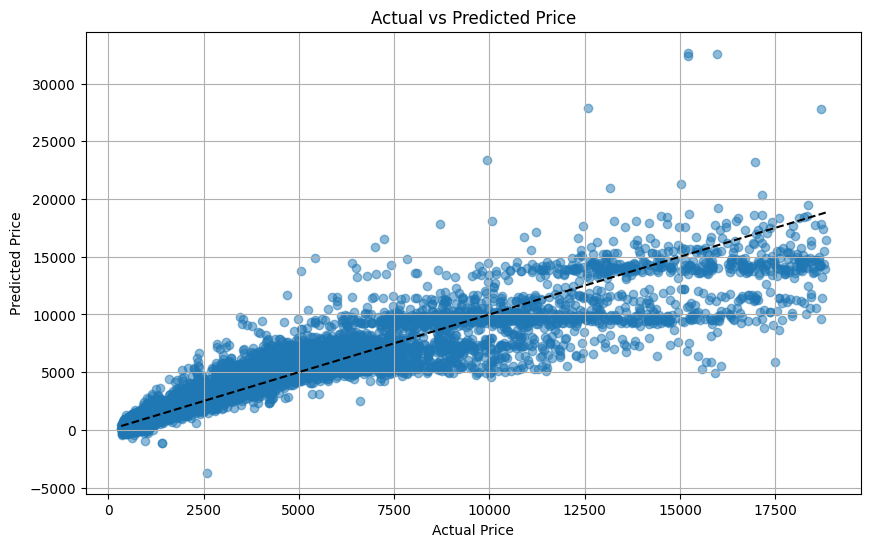

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred,alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()